In [ ]:
!pip install anthropic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 kB 6.0 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import anthropic

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Data

In [ ]:
data = pd.read_excel('Data_final.xlsx')

In [ ]:
data_test = data.copy()
data_test = data_test[data_test['Dataset'] == 'test']
#data_test['label'] = np.where(data_test['Categoria'] == 'Humor', 1, 0)
data_test = data_test.rename(columns={'ID': 'id', 'Texto': 'text', 'Categoría de 1 a 5': 'score'})
data_test = data_test[['id', 'text', 'Categoria', 'score']]
data_test = data_test.reset_index(drop=True)

In [ ]:
data_test.head()

,id,text,Categoria,score
0,1,"- ¡Rápido, necesitamos sangre! - Yo soy 0 posi...",Humor,4.0
1,3,El otro día unas chicas llamarón a mi puerta y...,Humor,3.0
2,6,Van dos ciegos y le dice uno al otro: - Ojalá...,Humor,2.0
3,7,Noticia de última hora!! Muere una suegra at...,Humor,4.0
4,9,"– Mamá, mamá, ¿me haces un bocata de jamón? – ...",Humor,1.0


In [ ]:
data_test.shape

(2000, 4)

In [ ]:
data_test['Categoria'].value_counts()

,count
Categoria,
Humor,1196
No Humor,804


# Claude

In [ ]:
api_key = 'API_KEY_CLAUDE'
client = anthropic.Anthropic(api_key=api_key)

In [ ]:
response = client.messages.create(
    model='claude-3-5-sonnet-20241022',
    max_tokens=100,
    messages=[
        {"role": "user", "content": "Explícame la división administrativa de México."}
    ]
)

print(response.content[0].text)

La división administrativa de México se estructura de la siguiente manera:

1. Estados:
- México está dividido en 32 entidades federativas:
- 31 estados
- 1 Ciudad de México (capital)

2. Municipios:
- Los estados se dividen en municipios
- Hay aproximadamente 2,457 municipios en todo el país
- La Ciudad de México se divide en 16 alcaldías (anteri


## Binary

In [ ]:
def predict_label(texts):
    predictions = []
    for i, text in enumerate(texts):
        prompt = f"""Tu tarea es clasificar un texto en 'Humor' o 'No Humor'. Responde solo con una de las dos etiquetas, sin texto adicional.

                      Ejemplos:
                      Texto: ¿Cuál es el animal más antiguo? – La vaca – ¿Por qué? – Porque está en blanco y negro.
                      Etiqueta: Humor

                      Texto: Hoy se cumplen 10 años desde que empecé mi trabajo actual. Ha sido un camino lleno de aprendizajes y desafíos.
                      Etiqueta: No Humor

                      Texto: {text}
                      Etiqueta:"""
        response = client.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=10,
            messages=[
                {"role": "user", "content": prompt}
            ]
        )
        prediction = response.content[0].text
        predictions.append(prediction)
        if (i + 1) % 10 == 0 or (i + 1) == len(texts):
            print(f"Classified texts: {i+1}/{len(texts)}")
    return predictions

In [ ]:
pred_labels = predict_label(data_test['text'])

Classified texts: 10/2000
Classified texts: 20/2000
Classified texts: 30/2000
Classified texts: 40/2000
Classified texts: 50/2000
Classified texts: 60/2000
Classified texts: 70/2000
Classified texts: 80/2000
Classified texts: 90/2000
Classified texts: 100/2000
Classified texts: 110/2000
Classified texts: 120/2000
Classified texts: 130/2000
Classified texts: 140/2000
Classified texts: 150/2000
Classified texts: 160/2000
Classified texts: 170/2000
Classified texts: 180/2000
Classified texts: 190/2000
Classified texts: 200/2000
Classified texts: 210/2000
Classified texts: 220/2000
Classified texts: 230/2000
Classified texts: 240/2000
Classified texts: 250/2000
Classified texts: 260/2000
Classified texts: 270/2000
Classified texts: 280/2000
Classified texts: 290/2000
Classified texts: 300/2000
Classified texts: 310/2000
Classified texts: 320/2000
Classified texts: 330/2000
Classified texts: 340/2000
Classified texts: 350/2000
Classified texts: 360/2000
Classified texts: 370/2000
Classified

In [ ]:
pred_labels[:5]

['Humor', 'Humor', 'Humor', 'Humor', 'Humor']

In [ ]:
test_labels = data_test['Categoria'].tolist()

In [ ]:
len(test_labels)

2000

In [ ]:
target_names = ['No Humor', 'Humor']
print(classification_report(test_labels, pred_labels, target_names=target_names))

              precision    recall  f1-score   support

    No Humor       0.98      1.00      0.99      1196
       Humor       1.00      0.97      0.98       804

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



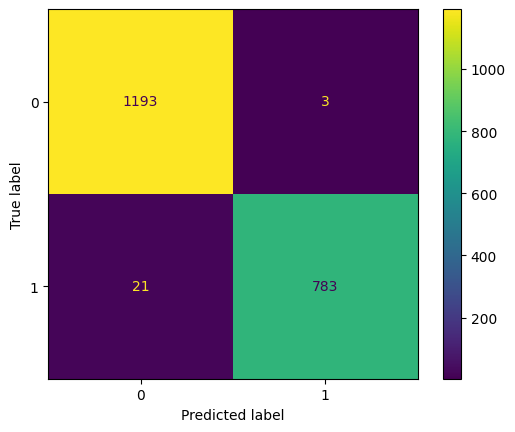

In [ ]:
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Multi-class

In [ ]:
data_test_mc = data_test.copy()
data_test_mc = data_test_mc.dropna(subset=['score'])
data_test_mc['score'] = data_test_mc['score'].astype(int)
data_test_mc = data_test_mc.reset_index(drop=True)

In [ ]:
data_test_mc.head()

,id,text,Categoria,score
0,1,"- ¡Rápido, necesitamos sangre! - Yo soy 0 posi...",Humor,4
1,3,El otro día unas chicas llamarón a mi puerta y...,Humor,3
2,6,Van dos ciegos y le dice uno al otro: - Ojalá...,Humor,2
3,7,Noticia de última hora!! Muere una suegra at...,Humor,4
4,9,"– Mamá, mamá, ¿me haces un bocata de jamón? – ...",Humor,1


In [ ]:
data_test_mc.shape

(1196, 4)

In [ ]:
data_test_mc['score'].value_counts()

,count
score,
3,434
4,407
2,195
1,114
5,46


In [ ]:
def predict_score(texts):
    predictions = []
    for i, text in enumerate(texts):
        response = client.messages.create(
            model="claude-3-5-sonnet-20241022",
            max_tokens=10,
            messages=[
                {"role": "user", "content": f"Asigna un puntaje entre 1 y 5 dependiendo del nivel de gracia causado por el siguiente texto, donde 1 es bajo y 5 es alto, retorna únicamente el puntaje:\n{text}"}
            ]
        )
        prediction = response.content[0].text
        predictions.append(prediction)
        if (i + 1) % 10 == 0 or (i + 1) == len(texts):
            print(f"Classified texts: {i+1}/{len(texts)}")
    return predictions

In [ ]:
pred_scores = predict_score(data_test_mc['text'])

Classified texts: 10/1196
Classified texts: 20/1196
Classified texts: 30/1196
Classified texts: 40/1196
Classified texts: 50/1196
Classified texts: 60/1196
Classified texts: 70/1196
Classified texts: 80/1196
Classified texts: 90/1196
Classified texts: 100/1196
Classified texts: 110/1196
Classified texts: 120/1196
Classified texts: 130/1196
Classified texts: 140/1196
Classified texts: 150/1196
Classified texts: 160/1196
Classified texts: 170/1196
Classified texts: 180/1196
Classified texts: 190/1196
Classified texts: 200/1196
Classified texts: 210/1196
Classified texts: 220/1196
Classified texts: 230/1196
Classified texts: 240/1196
Classified texts: 250/1196
Classified texts: 260/1196
Classified texts: 270/1196
Classified texts: 280/1196
Classified texts: 290/1196
Classified texts: 300/1196
Classified texts: 310/1196
Classified texts: 320/1196
Classified texts: 330/1196
Classified texts: 340/1196
Classified texts: 350/1196
Classified texts: 360/1196
Classified texts: 370/1196
Classified

In [ ]:
pred_scores_int = list(map(int, pred_scores))

In [ ]:
len(pred_scores_int)

1196

In [ ]:
test_scores = data_test_mc['score'].tolist()

In [ ]:
len(test_scores)

1196

In [ ]:
print(classification_report(test_scores, pred_scores_int))

              precision    recall  f1-score   support

           1       0.25      0.07      0.11       114
           2       0.17      0.32      0.22       195
           3       0.35      0.34      0.35       434
           4       0.37      0.34      0.35       407
           5       0.33      0.02      0.04        46

    accuracy                           0.30      1196
   macro avg       0.29      0.22      0.21      1196
weighted avg       0.32      0.30      0.29      1196



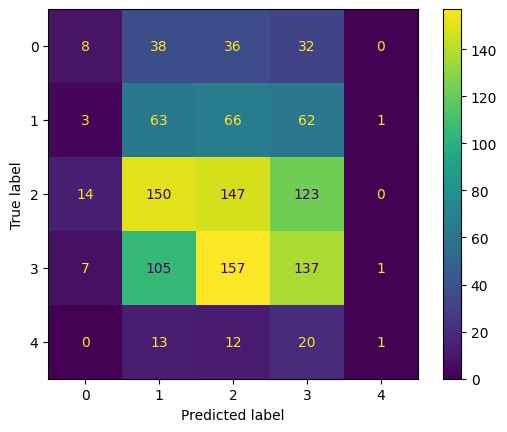

In [ ]:
cm = confusion_matrix(test_scores, pred_scores_int)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()